Notebook to check that data wrangling in lorenz.py was done properly.


### imports


In [2]:
# ipython extension to autoreload imported modules so that any changes will be up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

# libraries
import numpy as np
import matplotlib.pyplot as plt
from Lorenz96_plotter import plot_Lorenz96
from lorenz import run_Lorenz96_2coupled, lorenzDataset, lorenzToDF

2022-11-09 10:37:07.343801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### verification


In [3]:
lorenzToDF(n_days=10)

(1000, 72)


,X1_0,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,X1_9,...,X2_26,X2_27,X2_28,X2_29,X2_30,X2_31,X2_32,X2_33,X2_34,X2_35
day,,,,,,,,,,,,,,,,,,,,,
0.00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.01,7.990293,7.992917,7.990142,7.990073,7.990147,7.990148,7.990146,7.990146,7.990146,7.990146,...,0.980920,0.980919,0.980919,0.980925,0.980922,0.980894,0.980911,0.981026,0.980937,0.980589
0.02,7.981729,7.991540,7.980503,7.979988,7.980575,7.980595,7.980572,7.980571,7.980572,7.980572,...,0.963577,0.963523,0.963516,0.963683,0.963686,0.963249,0.963314,0.964223,0.963874,0.962492
0.03,7.975095,7.995665,7.970913,7.969311,7.971280,7.971374,7.971257,7.971252,7.971258,7.971258,...,0.948033,0.947574,0.947191,0.948169,0.948794,0.947045,0.946358,0.948867,0.949040,0.946402
0.04,7.971115,8.005070,7.961116,7.957634,7.962282,7.962551,7.962180,7.962163,7.962186,7.962187,...,0.934899,0.933800,0.930981,0.932774,0.936542,0.933999,0.930168,0.933196,0.935699,0.932702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.95,0.886942,-0.345004,-0.313850,5.192229,7.514618,-2.865611,2.971675,-0.928010,0.401402,3.839561,...,-0.079720,0.086336,0.422315,-0.031256,0.009271,-0.224916,0.179870,0.460911,-0.184286,-0.131590
9.96,0.974226,-0.245281,-0.243507,5.197778,7.379633,-2.912104,3.259461,-0.734968,0.472515,3.917059,...,-0.103714,0.030699,0.415776,0.015678,0.047561,-0.258150,0.196427,0.415412,-0.220019,-0.137743
9.97,1.050256,-0.145463,-0.169032,5.209367,7.239961,-2.935238,3.537403,-0.530791,0.545326,3.998170,...,-0.136854,-0.050631,0.406034,0.081937,0.077791,-0.278033,0.218774,0.356270,-0.257980,-0.144681


In [46]:
dataset = lorenzDataset(n_samples=10,
                        input_steps=300,
                        output_steps=1,
                        output_delay=19,
                        min_buffer=20,
                        rand_buffer=False,
                        K=36,
                        F=8,
                        c=10,
                        b=10,
                        h=1,
                        coupled=True,
                        time_resolution=0.01,
                        seed=42)


In [47]:
# check the adjacency matrix
dataset.a.todense()

matrix([[1., 1., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 0., 1., 1.]])

In [48]:
print(dataset[1])
print(dataset[1].x.shape)
print(dataset[1].y.shape)
print(dataset[1].t_X.shape)
print(dataset[1].t_Y.shape)

Graph(n_nodes=36, n_node_features=600, n_edge_features=None, n_labels=1)
(36, 600)
(36, 1)
(300,)
(1,)


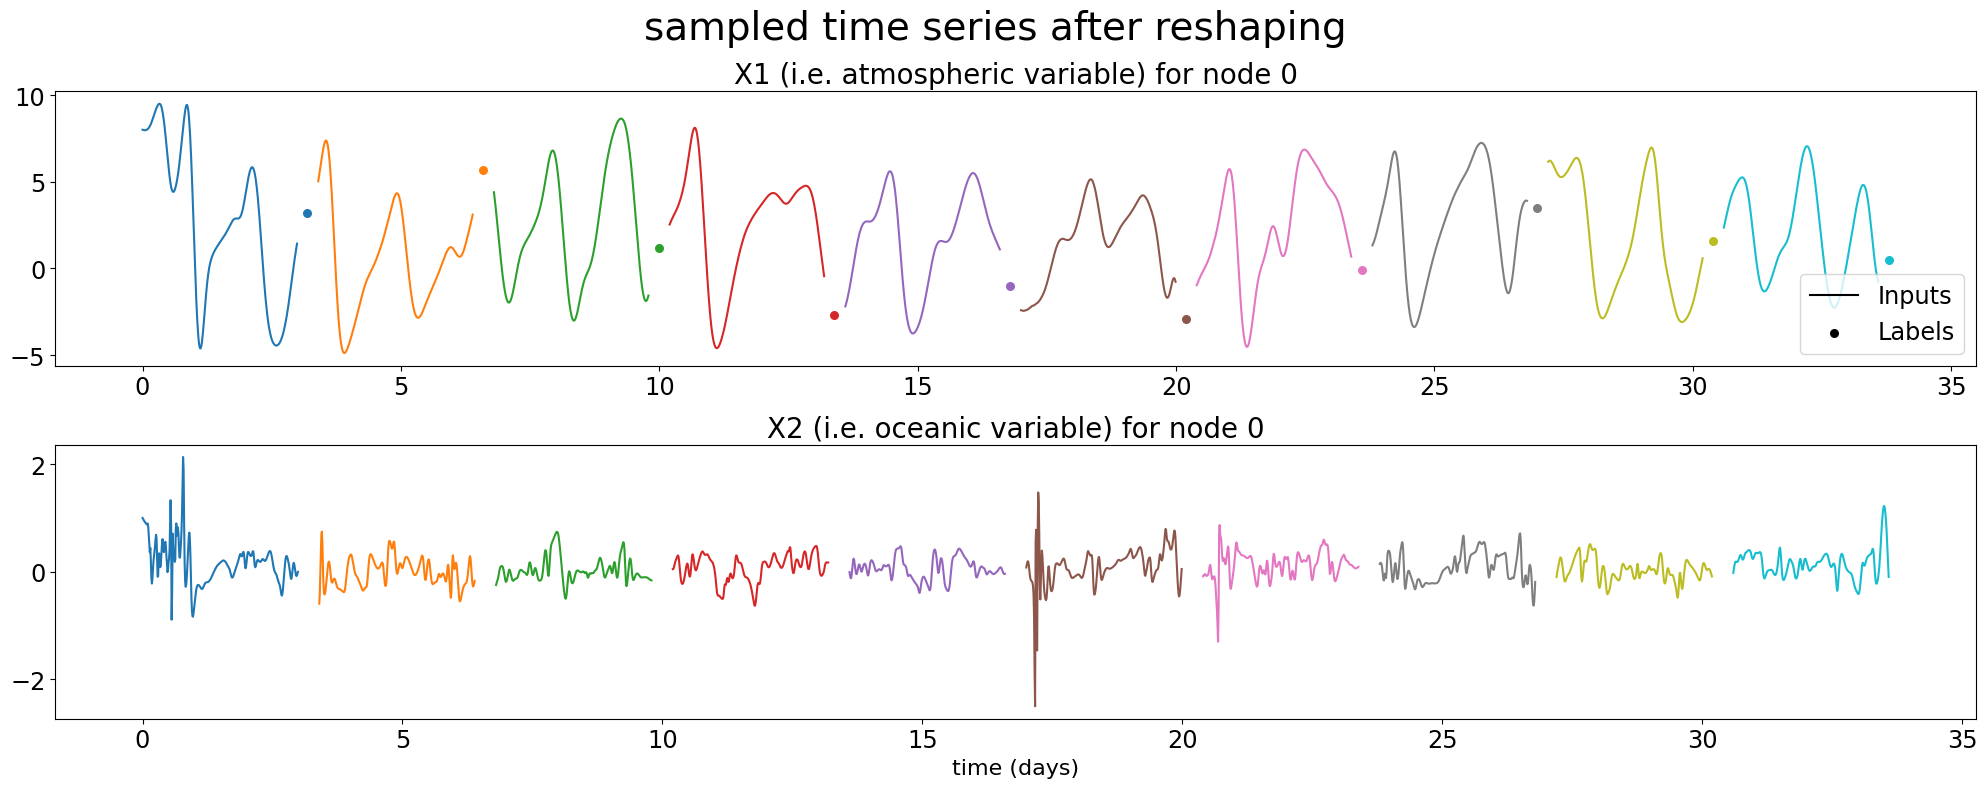

In [49]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 8))
node = 0
for g in dataset:
    ax0.plot(g.t_X, g.x[node][:dataset.input_steps], label='Inputs')
    ax1.plot(g.t_X, g.x[node][dataset.input_steps:], label='Inputs')
    ax0.scatter(g.t_Y, g.y[node][:dataset.output_steps],
                label='Labels', s=30)


fig.suptitle("sampled time series after reshaping", size=28)
ax0.set_title("X1 (i.e. atmospheric variable) for node {}".format(node), size=20)
ax1.set_title("X2 (i.e. oceanic variable) for node {}".format(node), size=20)
plt.xlabel('time (days)', size=16)

# create legend
ax0.legend()
ax0.legend(handles = ax0.get_legend().legendHandles[0:2], loc='lower right') # we only want 1 line and 1 circle, we don't want a bunch of repeated elements in the legend for differet-colored lines
leg = ax0.get_legend()
[lgd.set_color('black') for lgd in leg.legendHandles]

plt.tight_layout()
plt.show()

let's compare the samples against the original Lorenz data


First component
Second Component


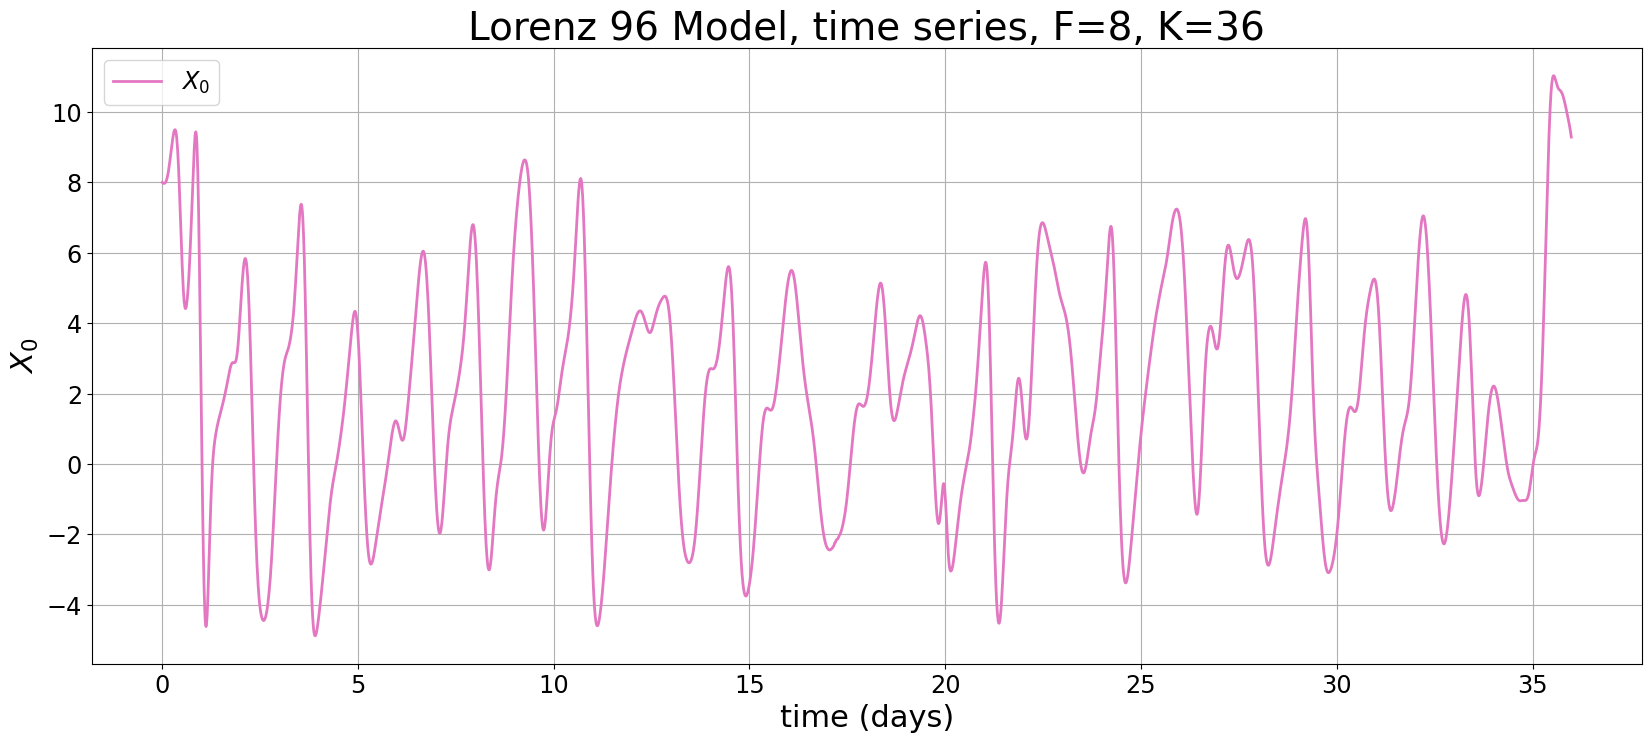

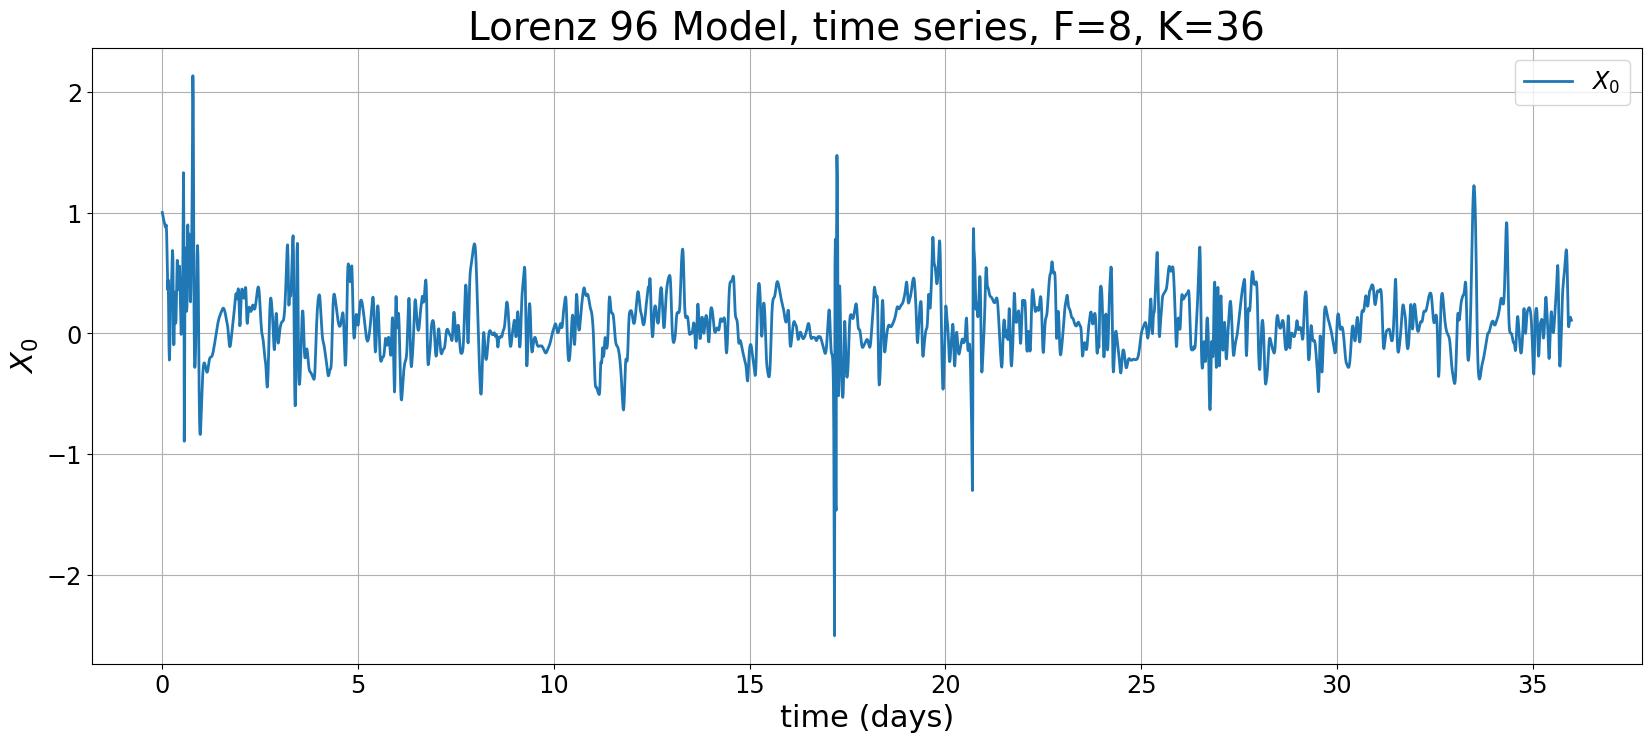

In [ ]:
t, X_raw, _, _, _ = run_Lorenz96_2coupled(K=36,
                                          F=8,
                                          c=10,
                                          b=10,
                                          h=1,
                                          number_of_days=36,
                                          seed=42)
plot_Lorenz96(True, False, X_raw, t, F=8, K=36, number_of_days=36)

great! they match.

questions:

- what if we want to train at multiple time scales?
